In [1]:
# Dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import requests
from pprint import pprint

# Import csv broadband data to dataframe
broadband_df = pd.read_csv("CSV_files/clean_broadband.csv")

# Census API Key
from config import census_api_key

In [2]:
# Assume year is 2017

# Craft base url
base_url = "https://api.census.gov/data/2017/ecnbasic"

# Craft query url
query_url = base_url + f"?get=NAICS2017_LABEL,EMP,NAME,GEO_ID&for=county:*&NAICS2017=51&key={census_api_key}"

# Grabs relevant data from census
response = requests.get(query_url).json()

In [3]:
# Initialize empty arrays
NAICS2017_label = []
number_employed = []
county_name = []
GEO_ID = []

# Creates arrays by appending relevant data to array,which maintains index.
for county in response:
    NAICS2017_label.append(county[0])
    number_employed.append(county[1])
    county_name.append(county[2])
    GEO_ID.append(county[3])
    
# Arrays are compiled into a dataframe
county_2017_df = pd.DataFrame({"NAICS2017 Label":NAICS2017_label,
                              "Number Employed":number_employed,
                              "County, State":county_name,
                              "GEO ID":GEO_ID})

# As the first row of the dataframe is the labels from the Census, it must be dropped.
county_2017_df.drop(index=0,inplace=True)

# Output the resulting array.
county_2017_df.head()

,NAICS2017 Label,Number Employed,"County, State",GEO ID
1,Information,0,"Benton County, Tennessee",0500000US47005
2,Information,199,"Warren County, Tennessee",0500000US47177
3,Information,1424,"Washington County, Tennessee",0500000US47179
4,Information,131,"Weakley County, Tennessee",0500000US47183
5,Information,0,"Campbell County, Tennessee",0500000US47013


In [4]:
# 2017 Broadband dataframe is crafted only grabbing relevant columns to prevent clutter
broadband_2017_df = broadband_df.loc[broadband_df["Year"] == 2017][["Broadband (%)","GEO ID","Year"]]

# Broadband dataframe is combined with county 2017 data from census.  Inner merge is used to drop all empty data points.
combined_2017_df = county_2017_df.merge(broadband_2017_df, how="inner", on="GEO ID")

# Data is output to screen and as a csv.
combined_2017_df.to_csv(f'CSV_files/{combined_2017_df["Year"].min()}_{combined_2017_df["NAICS2017 Label"].min()}_ecnbasic.csv',
                        index=False)
combined_2017_df.head()

,NAICS2017 Label,Number Employed,"County, State",GEO ID,Broadband (%),Year
0,Information,0,"Benton County, Tennessee",0500000US47005,0.561538,2017
1,Information,199,"Warren County, Tennessee",0500000US47177,0.567398,2017
2,Information,1424,"Washington County, Tennessee",0500000US47179,0.858978,2017
3,Information,131,"Weakley County, Tennessee",0500000US47183,0.628906,2017
4,Information,0,"Campbell County, Tennessee",0500000US47013,0.552326,2017


In [5]:
# Above is the work done to ensure the program works.  The below is a version that grabs a collection of dataframes based upon
#    NAICS labels.

# List of single labels to examine for all that the census has data on that doesn't crash.
# This was done by looking at census documentation, writing out each NAICS label into a list, and removing values that crashed
# The original list was [21,22,23,31,32,33,42,44,45,48,49,51,52,53,54,55,56,61,62,71,72,81]
NAICS_list = [22,51,52,53,54,56,61,62,71,72,81]

# Assume year is 2017

# Craft base url
base_url = "https://api.census.gov/data/2017/ecnbasic"

# Empty list of file paths is made
NAICS_2017_csv_paths = []

for label in NAICS_list:
    
    # As this label is printed first, if a csv is crafted, the next number appears. Otherwise, the last label crashed it.
    print(label)
 
    # query url is crafted
    query_url = base_url + f"?get=NAICS2017_LABEL,EMP,NAME,GEO_ID&for=county:*&NAICS2017={label}&key={census_api_key}"
   
    # census is called
    response = requests.get(query_url).json()
    
    # Initialize empty arrays
    NAICS2017_label = []
    number_employed = []
    county_name = []
    GEO_ID = []

    # Creates arrays by appending relevant data to array,which maintains index.
    for county in response:
        NAICS2017_label.append(county[0])
        number_employed.append(county[1])
        county_name.append(county[2])
        GEO_ID.append(county[3])
    
    # Arrays are compiled into a dataframe
    county_2017_df = pd.DataFrame({"NAICS2017 Label":NAICS2017_label,
                                  "Number Employed":number_employed,
                                  "County, State":county_name,
                                  "GEO ID":GEO_ID})

    # As the first row of the dataframe is the labels from the Census, it must be dropped.
    county_2017_df.drop(index=0,inplace=True)
    
    # 2017 Broadband dataframe is crafted only grabbing relevant columns to prevent clutter
    broadband_2017_df = broadband_df.loc[broadband_df["Year"] == 2017][["Broadband (%)","GEO ID","Year"]]

    # Broadband dataframe is combined with county 2017 data from census.  Inner merge is used to drop all empty data points.
    combined_2017_df = county_2017_df.merge(broadband_2017_df, how="inner", on="GEO ID")

    # Data is saved as a csv.
    combined_2017_df.to_csv(f'CSV_files/{combined_2017_df["Year"].min()}_{combined_2017_df["NAICS2017 Label"].min()}_ecnbasic.csv',
                            index=False)
    
    # File path for csv file just written to is appended to an array
    NAICS_2017_csv_paths.append(f'CSV_files/{combined_2017_df["Year"].min()}_{combined_2017_df["NAICS2017 Label"].min()}_ecnbasic.csv')
    
# List of csv paths is turned into a dataframe then saved as a csv.
NAICS_2017_csv_paths_df = pd.DataFrame({"Paths": NAICS_2017_csv_paths})
NAICS_2017_csv_paths_df.to_csv(f'CSV_files/NAICS_2017_csv_paths.csv', index=False) 

22
51
52
53
54
56
61
62
71
72
81


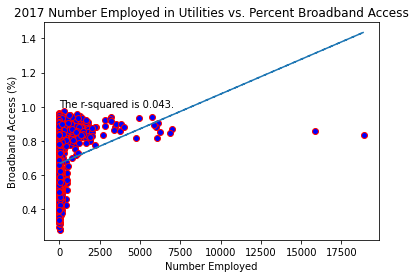

In [8]:
# This section runs a linear regression for all NAICS labels and broadband access

# The relevant path is defined
path = NAICS_2017_csv_paths_df["Paths"][0]

# Dataframe for relevant label is made
label_df = pd.read_csv(path)

# Linear regression is run
label_slope, label_int, label_r, p, std_err = stats.linregress( label_df['Number Employed'] , label_df['Broadband (%)'] )
label_fit = label_slope * label_df['Number Employed'] + label_int

# Plot is crafted and labeled then linear regression and r-squared is superimposed
plt.scatter(label_df['Number Employed'] ,label_df['Broadband (%)'] , marker="o", facecolors="blue", edgecolors="red")
plt.title(f'{label_df["Year"].min()} Number Employed in {label_df["NAICS2017 Label"].min()} vs. Percent Broadband Access')
plt.xlabel("Number Employed")
plt.ylabel("Broadband Access (%)")
plt.plot(label_df['Number Employed'] , label_fit,"--")
plt.text(0,1,f'The r-squared is {round(label_r**2,3)}.')

# Code is being saved if needed.
# print(f"The slope is {round(label_slope,3)}.")
# print(f"The intercept is {round(label_int,3)}.")
# print(f"The r-squared is {round(label_r**2,3)}.")

# plot is output and saved as a png
plt.savefig(f'output_charts/{label_df["Year"].min()}_NAICS_{label_df["NAICS2017 Label"].min()}_lin_regress.png',format='png')